# TODO THIS IS JUST A FIRST ATTEMPT

In [1]:
# Basic imports
import re
import os.path
import numpy as np
import scipy as sp
import pandas as pd

#ML tools
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
logreg = LogisticRegression(solver='liblinear')

# Map-related imports
import json
import branca
import folium
from pandas.io.json import json_normalize
from IPython.core.display import display, HTML

# Plot-related imports
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:

# Basic imports
import re
import os.path
import numpy as np
import scipy as sp
import pandas as pd

# Map-related imports
import json
import branca
import folium
from pandas.io.json import json_normalize
from IPython.core.display import display, HTML

# Plot-related imports
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual

In [3]:
# General parameters
%matplotlib inline
plt.style.use('seaborn')#switch to seaborn style
plt.rcParams["figure.figsize"] = [16,10]

DATA_FOLDER = './data/'

# Data Loading
-> TODO  description  
**The Data has been fetched and cleaned with `BASH`scripts, please look in the *dataCleaning* section to understand how**

**Home made fetched dataset:**

In [4]:
# Importing ingredients to Pandas DF
allrecipes_df = pd.read_csv(DATA_FOLDER + 'allrecipes.csv', sep='\t',  header=None, encoding = "utf-8")
allrecipes_df.columns = ['ID', 'Region', 'Title', 'Ingredients', 'kcal', 'carb', 'fat', 'protein', 'sodium', 'cholesterol']

# Bug?? need to convert into numeric somes, TODO EFFICIENT WAY TO DO THIS???
allrecipes_df['kcal'] = pd.to_numeric(allrecipes_df['kcal'], errors='coerce')
allrecipes_df['carb'] = pd.to_numeric(allrecipes_df['carb'], errors='coerce') / 1000.0 # convert to g
allrecipes_df['fat'] = pd.to_numeric(allrecipes_df['fat'], errors='coerce') / 1000.0 # convert to g
allrecipes_df['protein'] = pd.to_numeric(allrecipes_df['protein'], errors='coerce')
allrecipes_df['sodium'] = pd.to_numeric(allrecipes_df['sodium'], errors='coerce')
allrecipes_df['cholesterol'] = pd.to_numeric(allrecipes_df['cholesterol'], errors='coerce')

# Remove any rows which isn't properly formatted
allrecipes_df = allrecipes_df.dropna()

# Remove any duplicated lines
allrecipes_df = allrecipes_df.drop_duplicates().set_index('ID')

# Printing
allrecipes_df.head(5)

# Every values are in (g) except for sodium!

,Region,Title,Ingredients,kcal,carb,fat,protein,sodium,cholesterol
ID,,,,,,,,,
b9705d990df6857f20756fc996a54b63,us,Traditional Indiana Persimmon Pudding,2 cups persimmon pulp |2 eggs |1 cup white sug...,278.0,53.9,3.8,7.8,224.0,35.0
4658708d644d7b446d843fed5ddf60c4,us,Fish Tacos,1 cup all-purpose flour |2 tablespoons cornsta...,409.0,43.0,18.8,17.3,407.0,54.0
beed004e2a1772ba0db9da913f54122e,us,Wisconsin Slow Cooker Brats,8 bratwurst |2 (12 fluid ounce) cans or bottle...,377.0,12.8,27.4,13.8,1046.0,69.0
96353c72421bd74096277c6cf8b17097,us,Buffalo Chicken Wing Sauce,2/3 cup hot pepper sauce (such as Frank&#39;s ...,104.0,0.4,11.6,0.2,576.0,31.0
ee659a6a5e69834b60744cc3e103729e,us,Minnesota's Favorite Cookie,"1 cup butter, softened |1 1/2 cups brown sugar...",140.0,14.9,8.7,1.5,76.0,22.0


In [5]:
# Importing nutrition to Pandas DF, values are in [mg]!
allrecipes_desc_df = pd.read_csv(DATA_FOLDER + 'allrecipes_desc.csv', sep='£',  header=None, encoding = "utf-8",  engine='python')
allrecipes_desc_df.columns = ['ID', 'Description']

# Remove any duplicated lines
allrecipes_desc_df = allrecipes_desc_df.drop_duplicates().set_index('ID')

allrecipes_desc_df.head(5)

,Description
ID,
b9705d990df6857f20756fc996a54b63,Preheat the oven to 350 degrees F (175 degree...
4658708d644d7b446d843fed5ddf60c4,"To make beer batter: In a large bowl, combine..."
beed004e2a1772ba0db9da913f54122e,"Place bratwurst, beer, onion, and ketchup in ..."
96353c72421bd74096277c6cf8b17097,"Combine the hot sauce, butter, vinegar, Worce..."
ee659a6a5e69834b60744cc3e103729e,Preheat oven to 350 degrees F (175 degrees C)...


In [6]:
print("Number of recipes:", len(allrecipes_df.index.unique()))

Number of recipes: 15894


**Provided Dataset**

In [7]:
# Importing ingredients to Pandas DF
ing_df = pd.read_csv(DATA_FOLDER + 'cleaned_ing.csv', sep='\t',  header=None, encoding = "utf-8")
ing_df.columns = ['ID', 'Title', 'Ingredients']

# Importing ingredients to Pandas DF
nutri_df = pd.read_csv(DATA_FOLDER + 'cleaned_nutri.csv', sep='\t',  header=None, encoding = "utf-8")
nutri_df.columns = ['ID', 'kcal', 'carb', 'fat', 'protein', 'sodium', 'cholesterol']

# Merging
ing_df = ing_df.set_index('ID')
nutri_df = nutri_df.set_index('ID')
provided_df = ing_df.merge(nutri_df, on='ID', how='inner')

# Drop NaN's from ingredients
provided_df = provided_df.dropna().drop_duplicates()


# Bug?? need to convert into numeric somes, TODO EFFICIENT WAY TO DO THIS???
provided_df['kcal'] = pd.to_numeric(provided_df['kcal'], errors='coerce')
provided_df['carb'] = pd.to_numeric(provided_df['carb'], errors='coerce')
provided_df['fat'] = pd.to_numeric(provided_df['fat'], errors='coerce')
provided_df['protein'] = pd.to_numeric(provided_df['protein'], errors='coerce')
provided_df['sodium'] = pd.to_numeric(provided_df['sodium'], errors='coerce')
provided_df['cholesterol'] = pd.to_numeric(provided_df['cholesterol'], errors='coerce')

# Drop NaN's from nutrition, right now we keep it, remove afterwards
#provided_df = provided_df.dropna().drop_duplicates()

# TODO -> Infer nutritive values for NaN rows -> Matt

# Insert Region column to match the other DF
provided_df.insert(loc=1, column='Region', value=np.nan)
provided_df.head(5)

,Title,Region,Ingredients,kcal,carb,fat,protein,sodium,cholesterol
ID,,,,,,,,,
38e1b80017526d6e59ed3f986c35a43a,T.G.I. Friday's Jack Daniels Sauce Recipe #10265,NaN,1 teaspoon onion powder|1 tablespoon Tabasco s...,NaN,NaN,NaN,NaN,NaN,NaN
a3636a4dab434fe21fbcdceba7d6fcf2,Simple Peanut Squash Recipe,NaN,1 butternut squash|2 tablespoons brown sugar|1...,536.0,86.4,23.6,6.5,483.0,61.0
117f3c214e9de550a157ce5ee1f1cceb,Hash Brown Breakfast Casserole Recipe,NaN,"1 lb ground sausage (""hot"" or ""sage"" flavored)...",660.4,24.7,47.3,32.5,1248.0,251.6
fde8f280a690fb8bc77c10a7193db08b,Basic Homemade Country Sausage Recipe,NaN,2 pounds lean pork|1/2 pound pork fatback|3 te...,NaN,NaN,NaN,NaN,NaN,NaN
714df642f50b9ae489d285e16b59bf7b,Spinach Frittata Recipe,NaN,1 cup fresh spinach|2 egg whites|1 egg yolk|1/...,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("Number of recipes:", len(provided_df.index.unique()))

Number of recipes: 31376


In [9]:
# Concatenate the 2 DF and drop any duplicated lines, it is possible since some data come from the same website!
recipes_df = allrecipes_df.append(provided_df, sort=False).drop_duplicates()
recipes_df['Region'] = recipes_df['Region'].astype('category')

recipes_df.head()

,Region,Title,Ingredients,kcal,carb,fat,protein,sodium,cholesterol
ID,,,,,,,,,
b9705d990df6857f20756fc996a54b63,us,Traditional Indiana Persimmon Pudding,2 cups persimmon pulp |2 eggs |1 cup white sug...,278.0,53.9,3.8,7.8,224.0,35.0
4658708d644d7b446d843fed5ddf60c4,us,Fish Tacos,1 cup all-purpose flour |2 tablespoons cornsta...,409.0,43.0,18.8,17.3,407.0,54.0
beed004e2a1772ba0db9da913f54122e,us,Wisconsin Slow Cooker Brats,8 bratwurst |2 (12 fluid ounce) cans or bottle...,377.0,12.8,27.4,13.8,1046.0,69.0
96353c72421bd74096277c6cf8b17097,us,Buffalo Chicken Wing Sauce,2/3 cup hot pepper sauce (such as Frank&#39;s ...,104.0,0.4,11.6,0.2,576.0,31.0
ee659a6a5e69834b60744cc3e103729e,us,Minnesota's Favorite Cookie,"1 cup butter, softened |1 1/2 cups brown sugar...",140.0,14.9,8.7,1.5,76.0,22.0


In [10]:
print("Number of total recipes:", len(recipes_df.index.unique()))

Number of total recipes: 46999


**We have the correct sum hopefully, and there wasn't a lot of duplicated lines it seemes, we have to check the titles** TODO

# Maps -> custom map: https://geojson-maps.ash.ms/

In [11]:
# Loading JSON of world map
world_json = json.load(open(DATA_FOLDER + 'world-countries.json'))
cont_json = json.load(open(DATA_FOLDER + 'continents.json'))

In [20]:
print(list(pd.unique(recipes_df['Region'])))

['us', 'korean', 'japanese', 'indonesian', 'thai', 'indian', 'chinese', 'bangladeshi', 'filipino', 'malaysian', 'pakistani', 'vietnamese', 'mediteranean', 'israeli', 'turkish', 'persian', 'lebanese', 'african', 'australian', 'canadian', 'dutch', 'italian', 'french', 'swiss', 'scandinavian', 'austrian', 'eastern_europe', 'spanish', 'belgian', 'uk_and_ireland', 'greek', 'german', 'portuguese', 'caribbean', 'mexican', 'south_american', nan]


In [18]:
out={}
for i in range(len(cont_json['features'])):
    print(cont_json['features'][i]['properties'])
   

{'CONTINENT': 'Asia'}
{'CONTINENT': 'North America'}
{'CONTINENT': 'Europe'}
{'CONTINENT': 'Africa'}
{'CONTINENT': 'South America'}
{'CONTINENT': 'Oceania'}
{'CONTINENT': 'Australia'}
{'CONTINENT': 'Antarctica'}


In [55]:
dic_continent = {'korean': 'Asia','japanese': 'Asia','indonesian': 'Asia', 'thai': 'Asia',
 'indian': 'Asia', 'chinese': 'Asia',
 'bangladeshi': 'Asia','filipino': 'Asia', 'malaysian': 'Asia','pakistani': 'Asia','vietnamese': 'Asia', 'israeli': 'Asia',
 'persian': 'Asia','lebanese': 'Asia','us': 'North America', 'canadian': 'North America',
 'mediteranean': 'Europe', 'turkish': 'Europe', 'dutch': 'Europe', 'italian': 'Europe', 'french': 'Europe',
 'swiss': 'Europe', 'scandinavian': 'Europe','austrian': 'Europe', 'eastern_europe': 'Europe',
 'spanish': 'Europe', 'belgian': 'Europe', 'uk_and_ireland': 'Europe', 'greek': 'Europe',
 'german': 'Europe', 'portuguese': 'Europe', 'african': 'Africa', 'south_american': 'South America',
 'mexican': 'South America', 'australian': 'Australia', 'caribbean':'South America'}

In [56]:
recipes_continent = recipes_df.copy()
recipes_continent['Region'] = recipes_continent.replace({'Region':dic_continent})
recipes_continent.head()

,Region,Title,Ingredients,kcal,carb,fat,protein,sodium,cholesterol
ID,,,,,,,,,
b9705d990df6857f20756fc996a54b63,North America,Traditional Indiana Persimmon Pudding,2 cups persimmon pulp |2 eggs |1 cup white sug...,278.0,53.9,3.8,7.8,224.0,35.0
4658708d644d7b446d843fed5ddf60c4,North America,Fish Tacos,1 cup all-purpose flour |2 tablespoons cornsta...,409.0,43.0,18.8,17.3,407.0,54.0
beed004e2a1772ba0db9da913f54122e,North America,Wisconsin Slow Cooker Brats,8 bratwurst |2 (12 fluid ounce) cans or bottle...,377.0,12.8,27.4,13.8,1046.0,69.0
96353c72421bd74096277c6cf8b17097,North America,Buffalo Chicken Wing Sauce,2/3 cup hot pepper sauce (such as Frank&#39;s ...,104.0,0.4,11.6,0.2,576.0,31.0
ee659a6a5e69834b60744cc3e103729e,North America,Minnesota's Favorite Cookie,"1 cup butter, softened |1 1/2 cups brown sugar...",140.0,14.9,8.7,1.5,76.0,22.0


In [58]:
#Now we groupby by continents and compute the mean ok the recipe kcal
continent_cat = recipes_continent.groupby('Region').agg('mean')
continent_cat

,kcal,carb,fat,protein,sodium,cholesterol
Region,,,,,,
Africa,349.953586,35.119831,16.307595,17.091983,541.940928,52.497890
Asia,333.301237,30.670892,16.406714,16.857465,695.660336,60.098498
Australia,321.774000,28.982800,16.279400,15.527600,488.068000,57.420000
Europe,363.204903,32.711826,18.849551,15.767403,594.436751,70.708271
North America,348.937251,31.720599,17.826696,15.672173,648.852550,71.109756
South America,347.672688,30.695773,17.349566,17.309068,701.391980,61.942197


In [81]:
for i in range(8):
    print(cont_json['features'][i]['properties']['CONTINENT'])

Asia
North America
Europe
Africa
South America
Oceania
Australia
Antarctica


In [82]:
def layer_colormap(topojson, df, column, colorscale):
    
    # Create a layer
    feature_map = folium.FeatureGroup(name=column, overlay=False)  
    
    # Fetch values from the DataFrame and apply the colormap to the values
    # If the value is NaN, the corresponding color is dark-grey
    def style_function(feature):
        value = df.loc[feature['Region']][column]
        return {
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.5,
            'fillColor': '#black' if np.isnan(value) else colorscale(value)
        }
    
    # Append the colormap layer to the featuremap
    for i in range(8):
        object_pathway = ['features'][i]['properties']['CONTINENT']
    folium.TopoJson(topojson, object_path=object_pathway, style_function=style_function).add_to(feature_map)

    return feature_map;

In [83]:
# Create a new empty map
world_map= folium.Map([30,0], tiles='cartodbpositron', zoom_start=2)
colorscale = branca.colormap.LinearColormap(colors=['red','yellow','green'],
                                            index=[-50,0,75],
                                            vmin=-50,vmax=75)

# Adding for Each party the colormap
for category in continent_cat:
    layer_colormap(cont_json, continent_cat, category, colorscale).add_to(world_map)
    
# Add a legend to the colormap and append it to the base layer
colorscale.caption = 'Indices of nutrient values'
world_map.add_child(colorscale) 

# Adding the tile Layer thus it is prettier
folium.TileLayer(tiles='cartodbpositron', overlay=True).add_to(world_map)

# Layer Control to select the different layer created before
folium.LayerControl(collapsed=False, position='bottomleft').add_to(world_map);

# Save/Display
#swiss_vshare.save('map_task3_b.html')

TypeError: string indices must be integers

In [60]:
world_map

AttributeError: 'NoneType' object has no attribute 'get'

In [12]:
# Creating a new map
m_world= folium.Map([30,0], tiles='cartodbpositron', zoom_start=2)
folium.GeoJson(world_json).add_to(m_world)
m_world

In [13]:
# Creating a new map
m_continent= folium.Map([30,0], tiles='cartodbpositron', zoom_start=2)
folium.GeoJson(cont_json).add_to(m_continent)
m_continent

# Analysis

In [14]:
# Some CLassic analysis
recipes_regions = recipes_df.groupby('Region')
recipes_regions = recipes_regions.agg({'kcal' : ['mean', 'median', 'min', 'max'],
                                       'carb' : ['mean', 'median', 'min', 'max'],
                                       'fat' : ['mean', 'median', 'min', 'max'],
                                       'protein' : ['mean', 'median', 'min', 'max'],
                                       'sodium' : ['mean', 'median', 'min', 'max'],
                                       'cholesterol' : ['mean', 'median', 'min', 'max']})
recipes_regions.sort_values([('kcal', 'mean')], ascending=False)

kcal                             carb              \
                      mean median    min     max       mean median  min   
Region                                                                    
malaysian       435.600000  427.0   33.0  1238.0  30.422857  26.70  1.7   
portuguese      402.173333  378.0   27.0  2266.0  33.832000  28.50  4.0   
italian         391.215459  360.0    4.0  1641.0  34.242171  29.90  0.0   
indonesian      387.648649  401.0   65.0   716.0  29.056757  19.60  6.5   
french          377.932609  319.5    9.0  3274.0  27.991739  22.05  0.4   
thai            374.692000  358.0   17.0  1488.0  35.389200  23.60  0.8   
pakistani       372.611111  339.5   43.0   874.0  37.469444  29.45  5.4   
filipino        364.758065  314.5    4.0  1430.0  27.605914  21.80  0.0   
korean          360.578947  312.5    6.0  1358.0  30.457237  21.10  1.0   
us              360.114458  320.0    3.0  2309.0  31.599541  26.50  0.0   
vietnamese      359.376623  329.0    7.0  1263.0  34.489610  22.50  1.7   
uk_and_ireland  357.788991  319.0   27.0  1489.0  38.644954  35.25  0.3   
spanish         355.340136  292.0   18.0  1564.0  29.051020  24.00  1.0   
african         349.953586  321.0    4.0  1626.0  35.119831  30.90  0.8   
mexican         349.542381  325.0    3.0  1809.0  30.161722  26.35  0.0   
caribbean       348.824281  316.0    3.0  1473.0  32.938658  27.60  0.5   
austrian        346.368421  347.5   49.0   937.0  40.460526  40.15  5.7   
persian         345.830189  297.0   46.0   870.0  35.315094  28.30  0.9   
bangladeshi     345.533333  336.0  187.0   671.0  27.953333  28.60  5.7   
belgian         342.687500  314.5  111.0   659.0  32.456250  27.25  6.3   
turkish         339.000000  319.5    6.0   691.0  31.464583  27.85  1.0   
chinese         337.260000  301.0   16.0  2475.0  28.810286  21.60  0.8   
eastern_europe  336.722864  310.0   12.0  1283.0  31.757506  26.80  0.1   
greek           333.874693  314.0    9.0  1070.0  26.909828  21.40  0.7   
south_american  328.654008  287.0    7.0  2108.0  32.731646  27.50  0.0   
swiss           326.033333  311.5   38.0  1019.0  37.110000  30.35  1.6   
dutch           325.208333  313.0   68.0   622.0  40.222917  34.45  3.0   
australian      321.774000  288.0    6.0  1294.0  28.982800  24.85  0.4   
german          320.070796  274.0    8.0  1762.0  32.441298  27.00  0.0   
canadian        310.886719  282.0    3.0  2235.0  32.132715  29.35  0.2   
indian          308.937583  284.0    6.0  1362.0  30.701859  23.40  0.0   
japanese        295.652174  257.0    7.0  1406.0  29.525652  20.80  0.3   
mediteranean    295.017964  268.0   22.0   853.0  28.680838  18.50  0.3   
lebanese        287.333333  268.0    7.0   990.0  26.633333  25.80  0.9   
israeli         270.666667  253.0    4.0   667.0  26.703704  23.00  0.7   
scandinavian    256.605911  236.0   19.0  1204.0  27.952217  23.80  1.4   

                             fat          ...   protein              sodium  \
                  max       mean median   ...       min    max         mean   
Region                                    ...                                 
malaysian       113.2  24.091429  19.80   ...       0.9   85.2   528.771429   
portuguese      108.6  20.009333  17.10   ...       0.2  101.0  1186.106667   
italian         174.8  19.998438  17.20   ...       0.0   83.3   704.962355   
indonesian       94.2  21.545946  19.00   ...       0.0   47.6   745.324324   
french          240.9  22.572391  18.15   ...       0.0   76.7   496.847826   
thai            180.7  18.665600  16.30   ...       0.0   89.1   785.376000   
pakistani       109.1  17.091667  16.25   ...       0.3   47.8   493.916667   
filipino        148.9  19.295161  13.90   ...       0.1  116.5   683.365591   
korean          184.9  18.369737  12.30   ...       0.3   65.3  1382.355263   
us              254.9  18.654848  14.75   ...       0.0  220.2   685.141997   
vietnamese      128.4  15.272727  11.40   ...       0.3  107.7   916.

In [15]:
# Looking for something sweet :P
brownies_df = recipes_df[recipes_df['Title'].str.contains("Brownies")].sort_values(by='kcal', ascending=True)
brownies_df.head(5)

,Region,Title,Ingredients,kcal,carb,fat,protein,sodium,cholesterol
ID,,,,,,,,,
9e6646404944013cef89e5cafc818d32,NaN,Weight Watchers Low Fat Brownies Recipe,1 Box Betty Crocker Fudge Brownies Mix|1 Can F...,8.8,1.8,0.0,0.3,20.4,0.0
2dd1833c3579c7ce4acafef7788196b9,NaN,Hungry Girl Cheesecake Brownies Recipe,1 (18 ounce) box pillsbury reduced sugar devil...,17.5,2.3,0.1,1.8,58.2,0.8
40f971c614372448a939df2144d39200,NaN,"No Fat, No Sugar Low Cal Chocolate Brownies Re...",2 tablespoons cocoa|1/4 cup boiling water|2 eg...,20.4,3.6,0.2,1.4,45.1,0.0
555a843165732186599abb5d87f9b983,NaN,Weight Watchers Pumpkin Brownies Recipe,1 box Devil's Food Cake Mix|1 can pumpkin|3/4 ...,23.0,5.0,0.3,0.4,118.9,0.0
f036a4ade94422417d860c52a74a0d41,NaN,Sugar Free Brownies Recipe,1/2 cup margarine|1/4 cup unsweetened cocoa po...,60.3,5.5,3.6,1.8,63.0,23.3


In [16]:
# Oh nooes!! Fat and kcal are correlated!! How surprising xD
# TODO commenti
def f(nutritive1, nutritive2):
    
    sns.set_context("notebook", font_scale=1.5)
    sns.scatterplot(recipes_df[nutritive1], recipes_df[nutritive2])
    plt.show()
    
# Interact
interact(f, nutritive1=['kcal', 'carb', 'fat', 'protein', 'sodium', 'cholesterol'],
            nutritive2=['kcal', 'carb', 'fat', 'protein', 'sodium', 'cholesterol']);

interactive(children=(Dropdown(description='nutritive1', options=('kcal', 'carb', 'fat', 'protein', 'sodium', …

In [17]:
# Correlation
# TODO commenti
def f(region):
    sns.set_context("notebook", font_scale=1.5)
    
    corr = recipes_df[recipes_df['Region'] == region].corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()
    
# Interact
interact(f, region=recipes_df.Region.unique().dropna());

interactive(children=(Dropdown(description='region', options=('us', 'korean', 'japanese', 'indonesian', 'thai'…

In [18]:
# TODO commenti
def f(nutritive):
    recipe_sorted = recipes_regions.sort_values([(nutritive, 'median')], ascending=False)

    sns.set_context("notebook", font_scale=1.5)
    sns.boxplot(recipes_df[nutritive], recipes_df['Region'], order=recipe_sorted.index)
    plt.show()
    
# Interact
interact(f, nutritive=['kcal', 'carb', 'fat', 'protein', 'sodium', 'cholesterol']);
# TODO for sodium put a xlim

interactive(children=(Dropdown(description='nutritive', options=('kcal', 'carb', 'fat', 'protein', 'sodium', '…

# Fun with ingredients

In [86]:
# TODO: AWESOME!!! FOOD SUBSTITIONS GONNA CHECK FOR OTHER WEBSITE
# http://thatsmyhome.com/food-substitutions/

**Workflow**:
- split list of ingredients (like posexplode in PySPark)
- get any statistic information
- Try to fetch a recipe base on given ingredients -> auto completion

In [87]:
# Copy for test
test = recipes_df.copy()

# Remove non alphabetic values expect of '|' which is the seperating char, lowercase to be insensitive
test['Ingredients'] = test['Ingredients'].str.replace('[^a-zA-Z\| ]+', '').str.lower()

# Replace the '|' char to ' ' for retrieving the useless informations
test['Ingredients'] = test['Ingredients'].str.replace('|', ' ')

In [88]:
# Retrieve list of known aliments
aliments_list = open(DATA_FOLDER + 'aliments').read().splitlines()

# Retrieve list of ingredients in overall
our_list = test['Ingredients'].str.split(" ", expand=True).stack().unique()

# Creating a Blacklist of non ingredient to filter afterward
aliments_list = ' '.join(aliments_list).split(' ')
gray_list = [item for item in our_list if not any(ing in item.split() for ing in aliments_list)]

In [89]:
# Get the distribution of ingredients that are in the graylist
foo = test['Ingredients'].str.split(" ", expand=True).stack()
bar = foo[foo.isin(gray_list)].value_counts().reset_index()

# Store the must frequent gray list item into the back list
# we only store the index, as it is much more useful
black_list = list(bar[bar.iloc[:,1] > 1000]['index'])
gray_list

['',
 'cups',
 'persimmon',
 'pulp',
 'eggs',
 'cup',
 'allpurpose',
 'teaspoons',
 'tablespoon',
 'tablespoons',
 'teaspoon',
 'plain',
 'juiced',
 'minced',
 'capers',
 'weed',
 'quart',
 'for',
 'frying',
 'pound',
 'cut',
 'into',
 'to',
 'ounce',
 'portions',
 'package',
 'medium',
 'head',
 'finely',
 'shredded',
 'fluid',
 'cans',
 'or',
 'bottles',
 'such',
 'as',
 'franks',
 'redhotr',
 'cold',
 'unsalted',
 'taste',
 'softened',
 'semisweet',
 'toffee',
 'bits',
 'chopped',
 'pecans',
 'pounds',
 'distilled',
 'prepared',
 'yellow',
 'hamburger',
 'buns',
 'warmed',
 'warm',
 'degrees',
 'f',
 'c',
 'active',
 'dry',
 'chunk',
 'drained',
 'packages',
 'hotr',
 'bunch',
 'cleaned',
 'inch',
 'pieces',
 'box',
 'chickenflavored',
 'crackers',
 'onions',
 'quartered',
 'chickens',
 'can',
 'rinsed',
 'wedges',
 'cloves',
 'peeled',
 'thai',
 'seasoned',
 'thinly',
 'bag',
 'coleslaw',
 'diced',
 'creamy',
 'miracle',
 'whiptm',
 'ounces',
 'linguine',
 'boneless',
 'skinless',


In [90]:
# Going back to the start, this time we remove the black list item
# TODO we should name remove from the ingredient list the black listed ingredients
# thus we can see adjectives in good use ( same for verb )
foo[~foo.isin(black_list)].value_counts()

salt             26509
pepper           24845
ground           22991
sugar            21523
and              21081
oil              18757
garlic           16086
cheese           15350
butter           15258
onion            14611
white            14560
flour            13530
water            12556
sliced           12058
black            11341
powder           11217
cream            10102
sauce            10038
chicken           9687
olive             9564
milk              9257
dried             9256
red               9226
green             8790
juice             8227
vanilla           6892
baking            6814
egg               6602
vegetable         6594
lemon             6423
                 ...  
softboiled           1
comment              1
manzanillo           1
florentine           1
kamaboko             1
middles              1
irishstyle           1
chich                1
folgersr             1
brujo                1
buena                1
greyr                1
slicedwhite

In [91]:
# Copy for test
test = recipes_df.copy()

# Remove non alphabetic values expect of '|' which is the seperating char, lowercase to be insensitive
test['Ingredients'] = test['Ingredients'].str.replace('[^a-zA-Z\| ]+', '').str.lower()

# Remove element from black list
test['Ingredients'] = test['Ingredients'].replace(black_list, '')

# Explose
foo = test['Ingredients'].str.split("|", expand=True).stack()
foo#[~foo.isin(black_list)].value_counts()
# TODO not working yet, using regex right here is too radical it removes letters

ID                                  
b9705d990df6857f20756fc996a54b63  0                                  cups persimmon pulp 
                                  1                                                 eggs 
                                  2                                      cup white sugar 
                                  3                                cups allpurpose flour 
                                  4                                teaspoons baking soda 
                                  5                                            cups milk 
                                  6                                    tablespoon butter 
                                  7                                                      
4658708d644d7b446d843fed5ddf60c4  0                                 cup allpurpose flour 
                                  1                               tablespoons cornstarch 
                                  2                            

### Fun with cooking time!

In [92]:
# Extract all timing from recipes
timing_df = allrecipes_desc_df['Description'].str.extractall(r'(\d+) minutes|(\d+) hour|hours')
timing_df.columns = ['minutes', 'hours'] 
#Replace Nan by 0 and switch to int type
timing_df = timing_df.fillna(0).astype(int)
#Change the our into minutes and sum the two columns
timing_df['hours']=timing_df['hours']*60
#Sum the number of minutes to get the recipe time
timing_df['Recipe Time (min)'] = timing_df['minutes']+timing_df['hours']

timing_df.head(10)



minutes  hours  Recipe Time (min)
ID                               match                                   
b9705d990df6857f20756fc996a54b63 0            0    120                120
                                 1           15      0                 15
beed004e2a1772ba0db9da913f54122e 0            0    240                240
                                 1            5      0                  5
ee659a6a5e69834b60744cc3e103729e 0           12      0                 12
1afe62458129f741d989b89d6ae8d08c 0           20      0                 20
7b93a05f2c4a9ff967957f62fe5c6622 0            0     60                 60
                                 1           30      0                 30
                                 2           30      0                 30
1eaa22e1674b18dfbd30ec384931e9b1 0            0    360                360

In [93]:
time_recipe = timing_df.groupby('ID').agg('sum')
time_recipe = time_recipe.drop(['minutes','hours'], axis=1)
time_recipe.head()

,Recipe Time (min)
ID,
00035a69b44a9dd1f88f2bb5faced261,90
000d31e632cab9e6902f05196354a007,660
0015417d2473d92a56da28883a27aff3,120
001cf1a5a0d1914f958cb2c823df6121,8
001f5efe07f4c72b4aaf846ec7616aba,13


(array([4.871e+03, 3.525e+03, 1.976e+03, 7.040e+02, 5.880e+02, 4.260e+02,
        1.920e+02, 3.110e+02, 1.210e+02, 2.270e+02, 1.190e+02, 9.900e+01,
        6.200e+01, 3.400e+01, 1.370e+02, 4.200e+01, 3.000e+01, 2.000e+01,
        8.000e+00, 1.900e+02, 5.600e+01, 4.900e+01, 2.700e+01, 4.100e+01,
        3.200e+01, 9.000e+00, 2.200e+01, 4.000e+00, 4.300e+01, 2.100e+01,
        1.100e+01, 9.000e+00, 1.000e+00, 1.500e+01, 4.000e+00, 8.000e+00,
        2.000e+00, 1.000e+00, 1.100e+01, 3.000e+00, 3.000e+00, 3.000e+00,
        7.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 3.000e+00, 3.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 6.500e+01, 1.200e+01, 1.600e+01,
        8.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

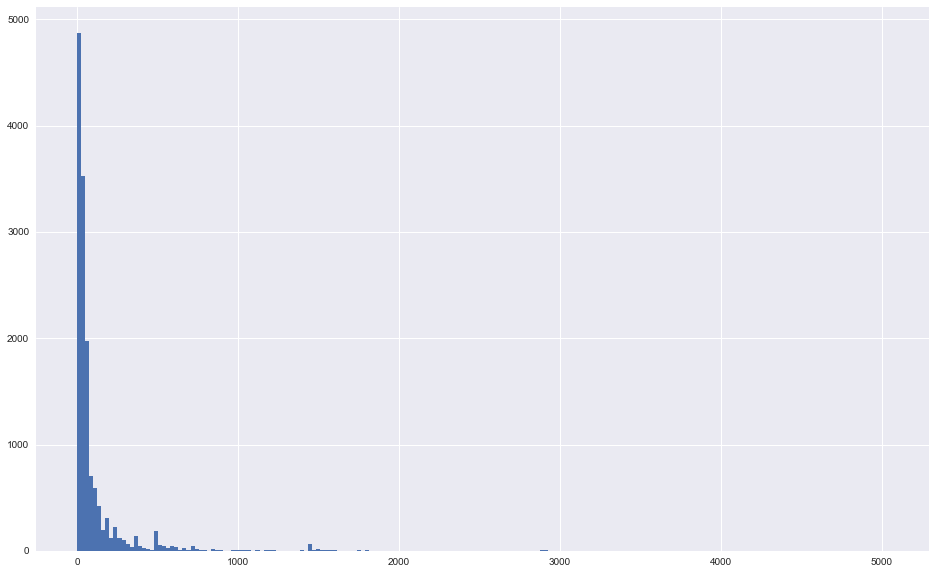

In [100]:
plt.hist(time_recipe['Recipe Time (min)'], bins=200)